# IPASS
Thijs van den Berg - 1740697

In dit bestand zal regelmatig het begrip _punten_ worden genoemd. Dit staat voor een array van (x, y) coördinaten in een (soms theoretische) tweedimentionale ruimte.

NB. Bronvermelding is te vinden in de `README.md`

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from ipassScript import *

plt.rcParams['figure.figsize'] = [12, 8]  # Grotere plots in Jupyter Notebook

## Casus: Percentage overlap van twee normale verdelingen berekenen
Twee normale verdelingen worden geplot. De normale verdelingen laten de geleidelijke, continue spreiding rond de gemiddeldes zien.  

De afstand van de gemiddeldes van de verdelingen tot het middelpunt dienen te worden meegegeven. In de titel is het percentage overlap van de twee verdelingen te zien. Verder dient er een lijst met twee labels te worden meegegeven, dit is straks handig om de coördinaten van de geplotte punten te zien.

Mee te geven argumenten: `plotNormaleVerdeling(mu, sigma, middelpuntAfstand, labels)`

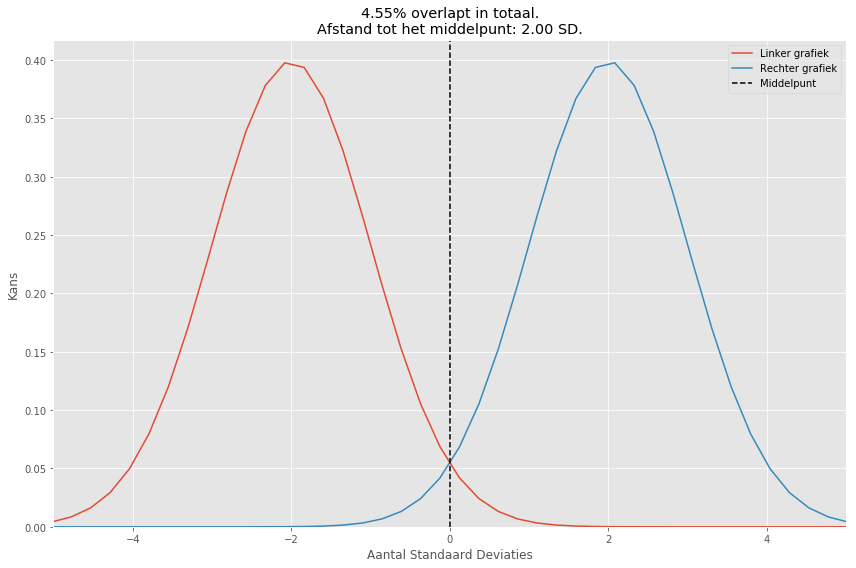

In [22]:
plotNormaleVerdeling(0, 1, 2, ["Linker grafiek", "Rechter grafiek"])

## Casus: Percentage overlap van alle combinaties van punten berekenen
Stel we hebben een Numpy Array met een $n$-aantal coödinaten/punten en we willen voor iedere combinatie van twee punten de overlap berekenen. Dan kan met de functie `plotAlleNormaleVerdlingen(punten)`.  

Door middel van $\sqrt{{p_1^2}+{p_2^2}} = \sqrt{c^2} = c$ kan de afstand van punt $p$ tot het middelpunt worden gevonden. Zodra de afstand tot het middelpunt is berekend kan ook het percentage overlap worden berekend.

Normale verdelingen zijn continue verdelingen die eeuwig door kunnen gaan. Daarom zijn onderstane plots van combinaties van punten die meer dan 0.00% (afgerond) overlappen. 

Stel we willen hebben een middelpunt $[4, 6]$ en een punt $[2, 5]$:  
${p_1} = 4-2 = 2$  
${p_2} = 6-5 = 1$  
${2^2+1^2} = {c^2}$  
${5} = {c^2}$  
$\sqrt{5} = {c} \approx 2.24$  

Concluderend, de hemelsbrede afstand van punt $[2, 5]$ naar het middelpunt $[4, 6]$ is $\approx 2.24$.  
Het tweede van twee punten is dus niet nodig om de afstand tot het middelpunt van twee punten te berekenen.

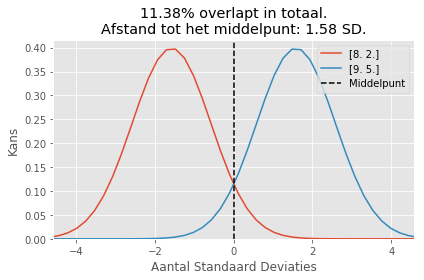

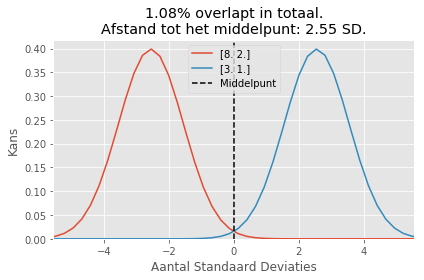

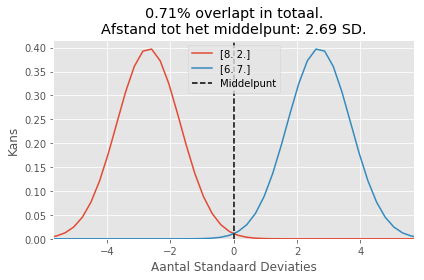

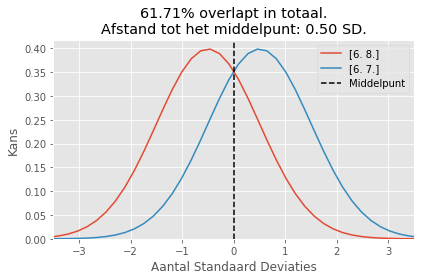

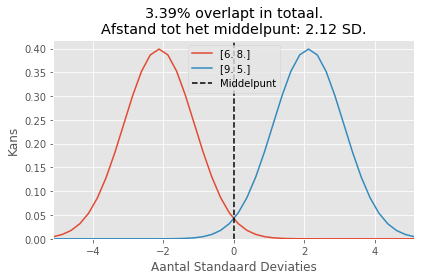

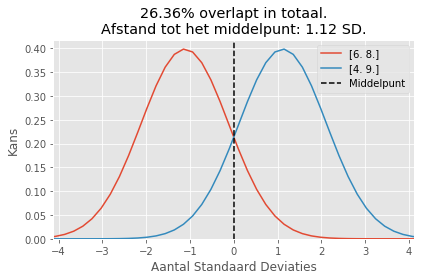

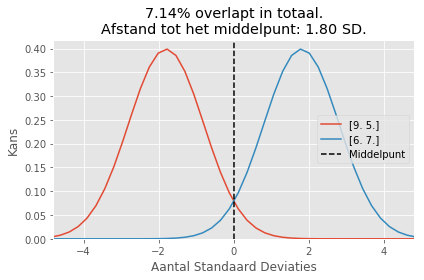

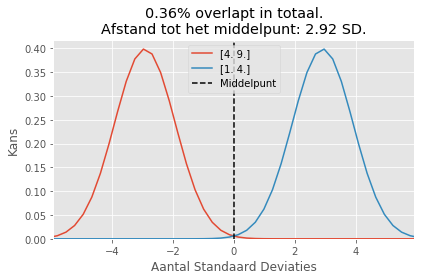

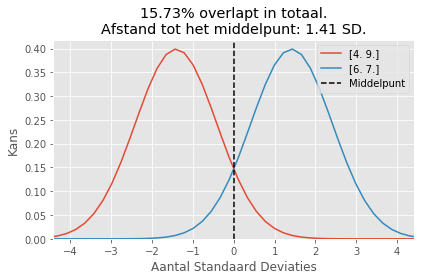

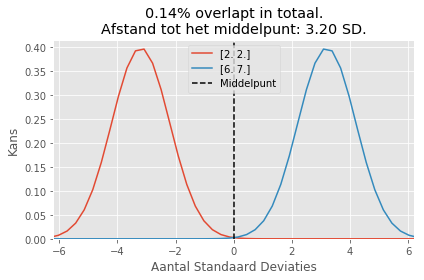

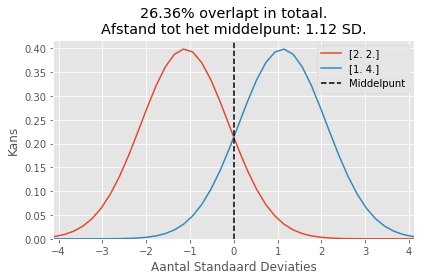

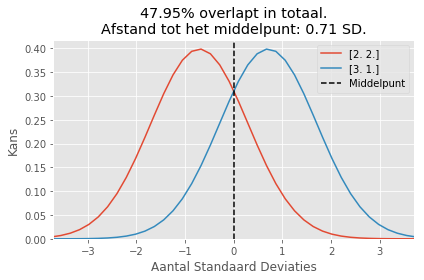

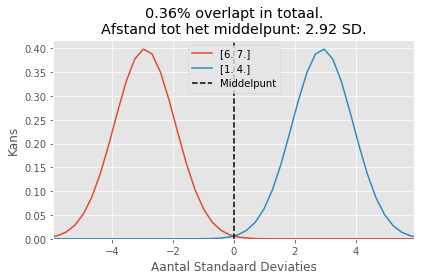

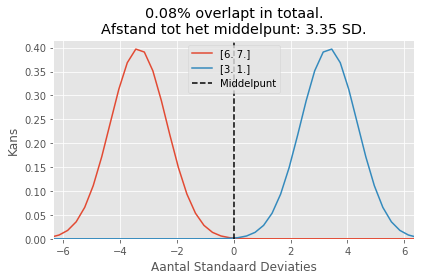

In [3]:
punten = np.array([[8, 2], [1, 4], [2, 2], [4, 9], [6, 7], [6, 8], [3, 1], [9, 5]])
# punten = np.random.randint(10, size=(8, 2))

plotAlleNormaleVerdelingen(punten)

### Casus: Verzorgingsgebied visualiseren
Soms kan het handig zijn om de data waarmee we bezig zijn, te visualiseren. De vlakken in onderstaande Voronoi-diagram kunnen grofweg worden gezien als het verzorgingsgebied van de punten. De rode punten zijn de meegegeven punten van de ($n$, 2)-array.

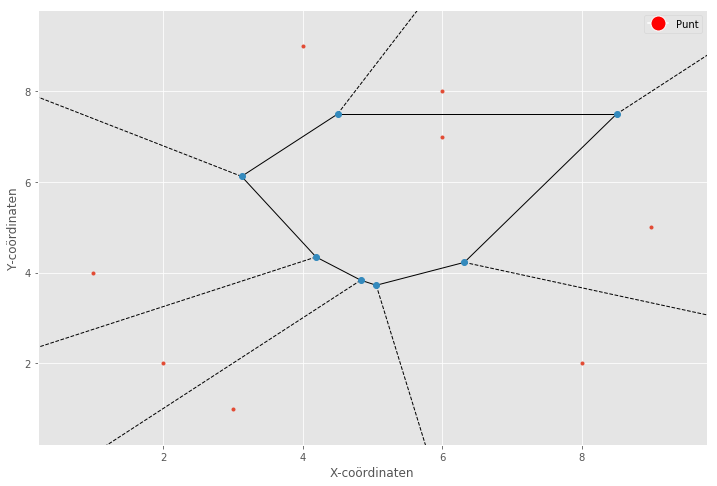

In [8]:
punten = np.array([[8, 2], [1, 4], [2, 2], [4, 9], [6, 7], [6, 8], [3, 1], [9, 5]])
# punten = np.random.randint(40, size=(32, 2))

plotVoronoi(punten)

### Casus: Verzorgingsgebied visualiseren met overlappings-percentages
Aangezien het verzorgingsgebied uiteraard niet precies stopt bij de grens, geef onderstaande plot de overlappings-percentages van iedere combinatie van punten weer. Het overlappings-percentage en de bijbehordende ellipse zijn alleen zichtbaar wanneer er meer dan 0.00% overlapping is.

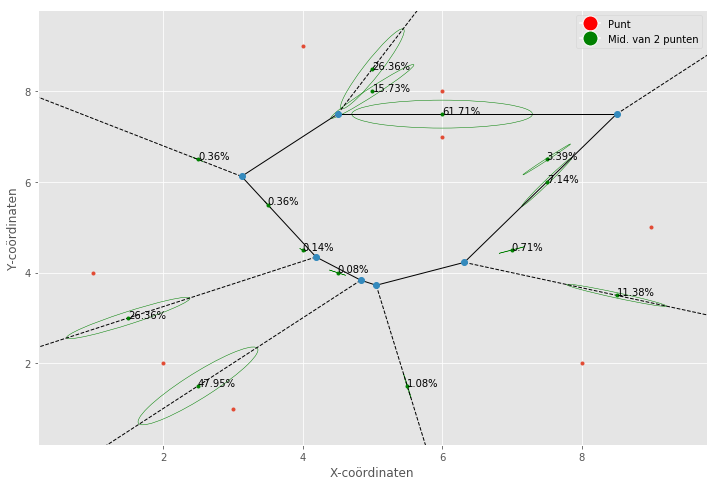

In [5]:
punten = np.array([[8, 2], [1, 4], [2, 2], [4, 9], [6, 7], [6, 8], [3, 1], [9, 5]])
# punten = np.random.randint(20, size=(16, 2))

plotVoronoiCompleet(punten, 0, 1)

## Casus: verloop van verspreiding simuleren

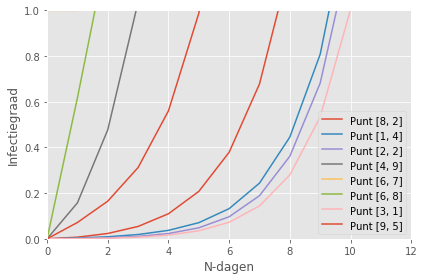

In [7]:
punten = np.array([[8, 2], [1, 4], [2, 2], [4, 9], [6, 7], [6, 8], [3, 1], [9, 5]])
overlapMatrix = berekenPercentageOverlapMatrix(punten, 0, 1)
inputVector = np.array([[0],[0],[0],[0],[1],[0],[0],[0] ])
labels = [[8, 2], [1, 4], [2, 2], [4, 9], [6, 7], [6, 8], [3, 1], [9, 5]]

plotVerloop(overlapMatrix, inputVector.T, 12, labels)

# Echte data gebruiken
-----------------
### Casus: Kinderdagverblijven in Wageningen
Het CSV-bestand `dataKDV.csv` bevat informatie van alle 45.000+ kinderdagverblijven, BSO's etc. van Nederland. Om bruikbare data van dit CSV-bestand te krijgen dienen de adressen omgezet te worden in coördinaten. Verder wordt uit alle data een selectie van Wageningen gemaakt ter illustratie.

In [4]:
# straat2Coord('data/dataKDV.csv', 'Wageningen', 'opvanglocatie_woonplaats', 'opvanglocatie_adres')  # CSV-bestand maken
coordinaten = pd.read_csv("data/geo_dataKDV.csv", sep=",")  # CSV-bestand uitlezen

Even geduld a.u.b, dit kan even duren...
    latitude  longitude
0  51.963189   5.652897
1  51.977455   5.669383
2  51.970015   5.672010
3  51.970864   5.659421
4  51.983897   5.642122


Om een beeld van de data te krijgen worden er twee Voronoi-diagrammen geplot. De meegegeven standaarddeviatie $0.004$ is een arbitrair getal en dient per type data te worden vastgesteld. Het verzorgingsgebied van een kinderdagverblijf is relatief klein waardoor er weinig spreiding zal zijn. Om de SD te bepalen zal er moeten worden gekeken naar de onderlinge afstand tussen de KDV's.

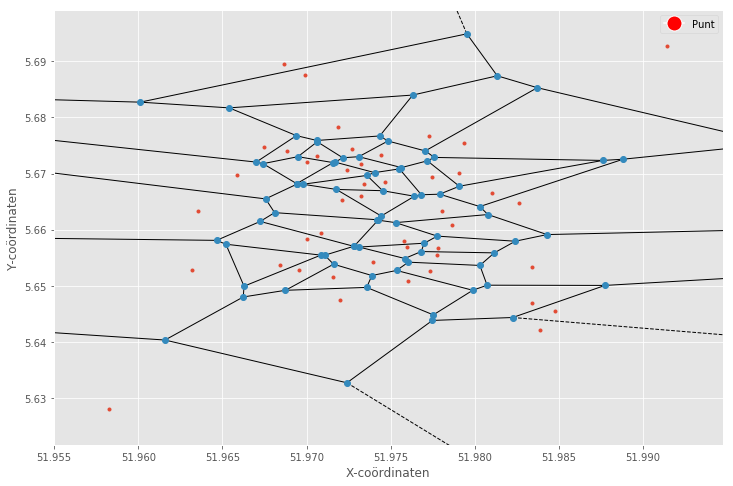

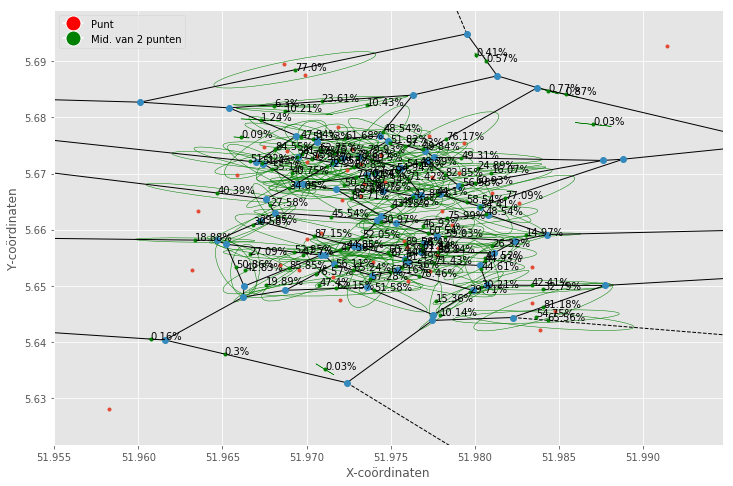

In [18]:
plt.rcParams['figure.figsize'] = [12, 8]  # Grotere plots in Jupyter Notebook
plotVoronoi(coordinaten)
plotVoronoiCompleet(coordinaten, 0, 0.004)

### Hondenpoepbakken in Tilburg
Dit bestand bevat origineel alleen maar gegevens van de latitude en longitude dus hoeft niet te worden geconverteerd.

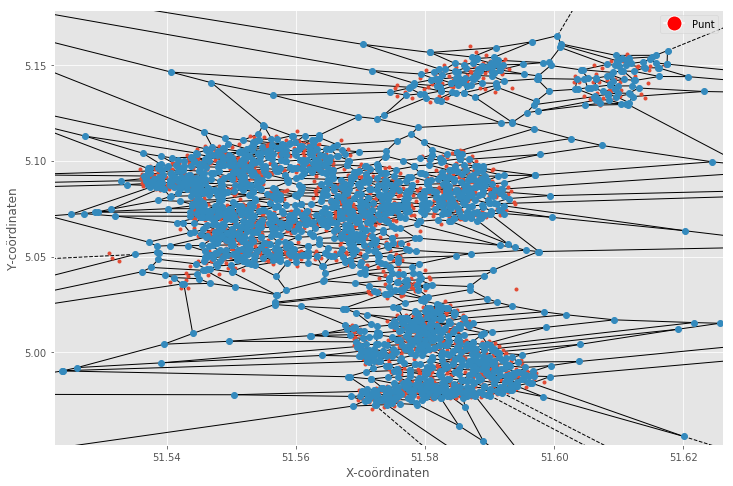

In [11]:
import pandas as pd

coordinaten = pd.read_csv("data/hondenpoepbakkenTilburg.csv", sep=",")
coordinaten = coordinaten.values[:, :]  # DataFrame omzetten naar NP-array

plotVoronoi(coordinaten)

In [12]:
# plotVoronoiCompleet(coordinaten, 0, 0.001)

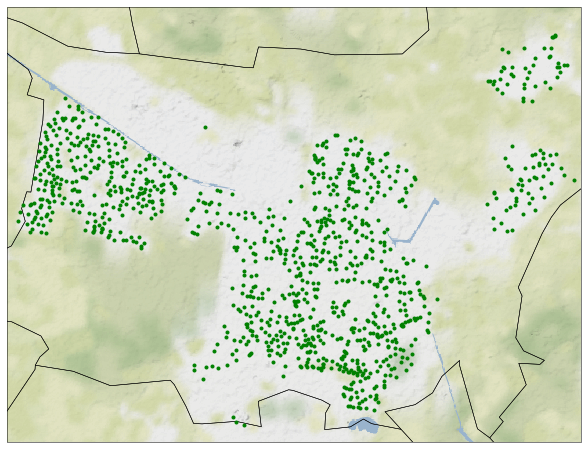

In [13]:
kaartMaken("data/hondenpoepbakkenTilburg.csv", terrein=True, cropped=True)

In [16]:
from ipassScript import straat2Coord, kaartMaken, coord2Coord

coord2Coord("data/distributiekastenDenHaag.csv", "LAT", "LONG")

Even geduld a.u.b, dit kan even duren...
Klaar!


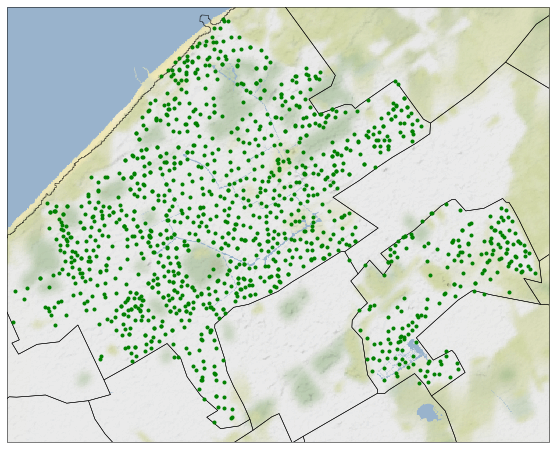

In [17]:
kaartMaken("data/geo_distributiekastenDenHaag.csv", terrein=True, cropped=True)

## Kaart maken van een CSV-bestand met coördinaten

Kaart aan het maken. 
Even geduld a.u.b, dit kan even duren...


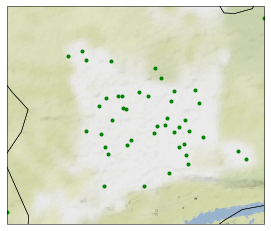

In [8]:
kaartMaken("data/geo_dataKDV.csv", terrein=True, cropped=True)